In [1]:
import networkx as nx
import torch
from torch_geometric.data import Data
import torch_geometric
import numpy as np
from torch_geometric.datasets import CoraFull, CitationFull
import matplotlib.pyplot as plt
from pylab import rcParams
import pandas as pd
#import GCNConv
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from torch_geometric.utils import to_undirected
from torch_geometric.transforms import ToUndirected
from tqdm import tqdm
import torch
import torch.nn.functional as F
from torch_geometric_temporal.nn.recurrent import DCRNN
from torch_geometric.transforms import ToUndirected
import torch
import torch.nn.functional as F
from torch_geometric_temporal.nn.recurrent import DCRNN
from torch_geometric_temporal.signal import temporal_signal_split
from torch_geometric_temporal.nn.recurrent import TGCN
from torch_geometric_temporal.signal import temporal_signal_split
from torch_geometric_temporal.signal import DynamicGraphTemporalSignal,StaticGraphTemporalSignal

from Trainer_loocv import Trainer
from utils_temporal import get_distance, draw_graph, nearest_neighbors_graph, plot_heatmap, dataset_generation
from sklearn.preprocessing import LabelEncoder
device = 'cuda' if torch.cuda.is_available() else 'cpu'
seed = 42
torch.manual_seed(seed)  
torch.random.manual_seed(42)           # Python random seed
np.random.seed(seed)            # NumPy random seed
torch.manual_seed(seed)         # Torch manual seed
torch.cuda.manual_seed(seed) 
%config InlineBackend.figure_format = 'retina'


In [2]:
G = nx.erdos_renyi_graph(3, 1)

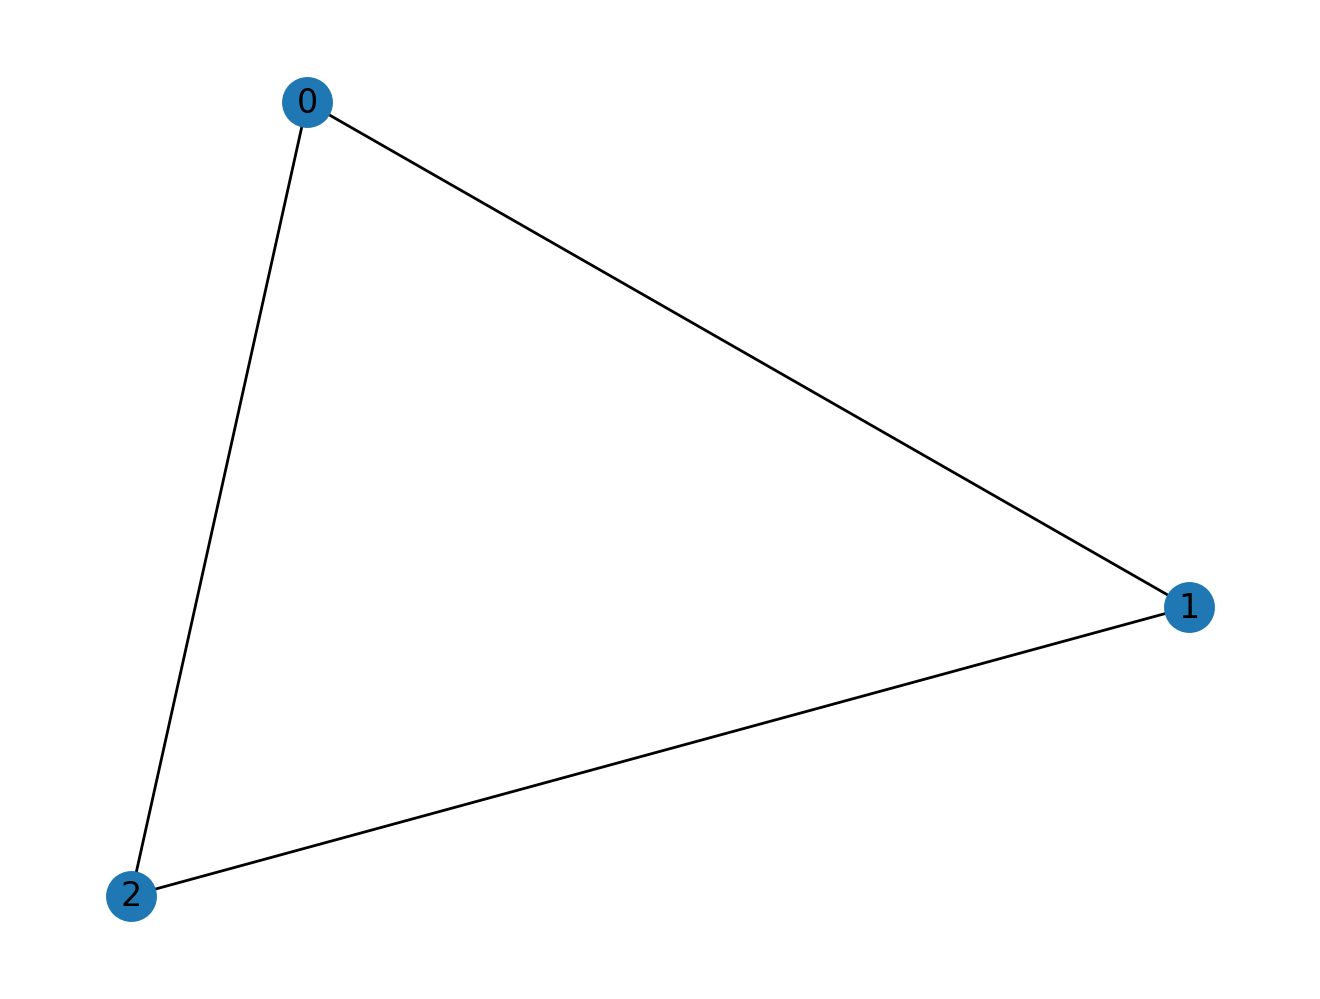

In [3]:
nx.draw(G, with_labels=True)

In [4]:
features = torch.rand(3, 7,4)
print(features.shape)

torch.Size([3, 7, 4])


In [5]:
undirected_edges = []
for edge in G.edges:
    undirected_edges.append(edge)
    undirected_edges.append((edge[1], edge[0]))  # Add the reverse edge

edge_index = torch.tensor(undirected_edges).t().contiguous()
edge_index

tensor([[0, 1, 0, 2, 1, 2],
        [1, 0, 2, 0, 2, 1]])

In [6]:
num_timesteps_in = 2
# x = df[df["time"] == "2014-05-01 00:00:00"]
final_node_features = []
final_target_features = []
indices = [
            (i)
            for i in range(features.shape[2] - (num_timesteps_in))
        ]

for i in indices:
    final_node_features.append(features[:,:,i:i+num_timesteps_in])



In [7]:
# convert to tensor
final_node_features = torch.stack(final_node_features).permute(0,3,1,2)

In [8]:
final_node_features.shape

torch.Size([2, 2, 3, 7])

In [9]:
gcn1 = GCNConv(7, 1)
gcn2 = GCNConv(7, 1)

In [21]:
gcn1(final_node_features.reshape(-1,3,7), edge_index).reshape(2,2,3,1)

tensor([[[[ 0.0860],
          [ 0.0860],
          [ 0.0860]],

         [[ 0.2492],
          [ 0.2492],
          [ 0.2492]]],


        [[[ 0.2492],
          [ 0.2492],
          [ 0.2492]],

         [[-0.0561],
          [-0.0561],
          [-0.0561]]]], grad_fn=<ReshapeAliasBackward0>)

In [11]:
final_node_features.shape

torch.Size([2, 2, 3, 7])

In [12]:
gcn1(final_node_features[0,0,:,:], edge_index)

tensor([[0.0860],
        [0.0860],
        [0.0860]], grad_fn=<AddBackward0>)

In [13]:
final_node_features[0,:,:,1]

tensor([[0.3904, 0.8860, 0.5315],
        [0.6009, 0.5832, 0.1587]])

In [15]:
# gcn_out = gcn1(final_node_features[1,:,:,1],  edge_index)
# gcn_out

In [18]:
final_output = []
for i in range(final_node_features.shape[0]):
    new_output = []
    for j in range(final_node_features.shape[1]):
        gcn_out = gcn1(final_node_features[i,j,:,:],  edge_index)
        new_output.append(gcn_out)
    final_output.append(torch.stack(new_output))
final_output = torch.stack(final_output)
print(final_output)

tensor([[[[ 0.0860],
          [ 0.0860],
          [ 0.0860]],

         [[ 0.2492],
          [ 0.2492],
          [ 0.2492]]],


        [[[ 0.2492],
          [ 0.2492],
          [ 0.2492]],

         [[-0.0561],
          [-0.0561],
          [-0.0561]]]], grad_fn=<StackBackward0>)
